In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt


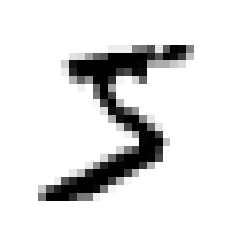

In [7]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28, 28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [8]:
y[0]

'5'

In [9]:
import numpy as np
y=y.astype(np.uint8)

In [10]:
X_train, X_test, y_train, y_test=X[:60000],X[60000:],y[:60000],y[60000:]

# Training a Binary Classifier

In [14]:
y_train_5=(y_train==5) #True for all 5s, false for all other digits
y_test_5=(y_test==5)

In [15]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [16]:
#  A stochastic Gradient Desent (SGD) classifier, using Scikit learns SGDClassifier class. the classifier has a advantage of 
# being capable of handling very large datasets efficiently


from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

# Performence Measures
measuring Accuracy Using Cross-Validation

In [19]:
# evaluating a classifier is often significantly trickier than regressor
# A good way to evaluate a model is to use cross-validation 

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

# Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# The ROC Curve

In [28]:
# the receiver operating characteristic curve is another common tool used with binary classifiers. it is very similar to the 
# precision/recall curve, the ROC curve plots the true positive rate against the false positive rate

In [29]:
from sklearn.metrics import roc_curve

In [31]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [33]:
fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

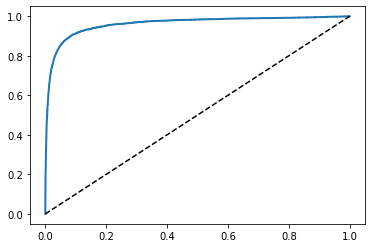

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0, 1],[0, 1], 'k--')
    [...]
plot_roc_curve(fpr,tpr)
plt.show()
    




In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
# one way to compare classifier is to measure the area under the curve(AUC).
# A perfect classifier will have a ROC AUC equal to 1.

0.9604938554008616

# lets compare the SGD with RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [41]:
y_scores_forest= y_probas_forest[:, 1]

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classifiction 
whereas binary classifier distinguish between two classes, multiclass classifiers can distinguish between more than two classes 

In [43]:
#Some algorithms (such as SGD classifiers, Random Forest Classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively.
#Others (such as logistic regression or support vector machine classifiers) are strictly binary classifier.

In [46]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
some_digit=X[0]

In [47]:
some_digit_scores=svm_clf.decision_function([some_digit])

In [48]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [49]:
# here it is using one vs one strategy 
# now we will be using multiclass classifier using the OvR strategy, based on an SVM

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf= OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

# Multilabel Classification

In [12]:
y_train_large=(y_train>=7)
y_train_odd=(y_train%2 ==1)
y_multilabel= np.c_[y_train_large, y_train_odd]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [16]:
knn_clf.predict([some_digit])

array([[False,  True]])